In [1]:
import os
import sys
import numpy
import json
import subprocess
import operator
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
filename = 'mutants_docked_geometry-interactions_post-processed.json'

with open(filename, 'r') as fp:
    S_mutants = json.load(fp)

In [3]:
mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

# Distributions of mean peptide Euler angles (unclassified)

> _NOTE_ `seaborn` chooses algorithmically the band width for every histogram.

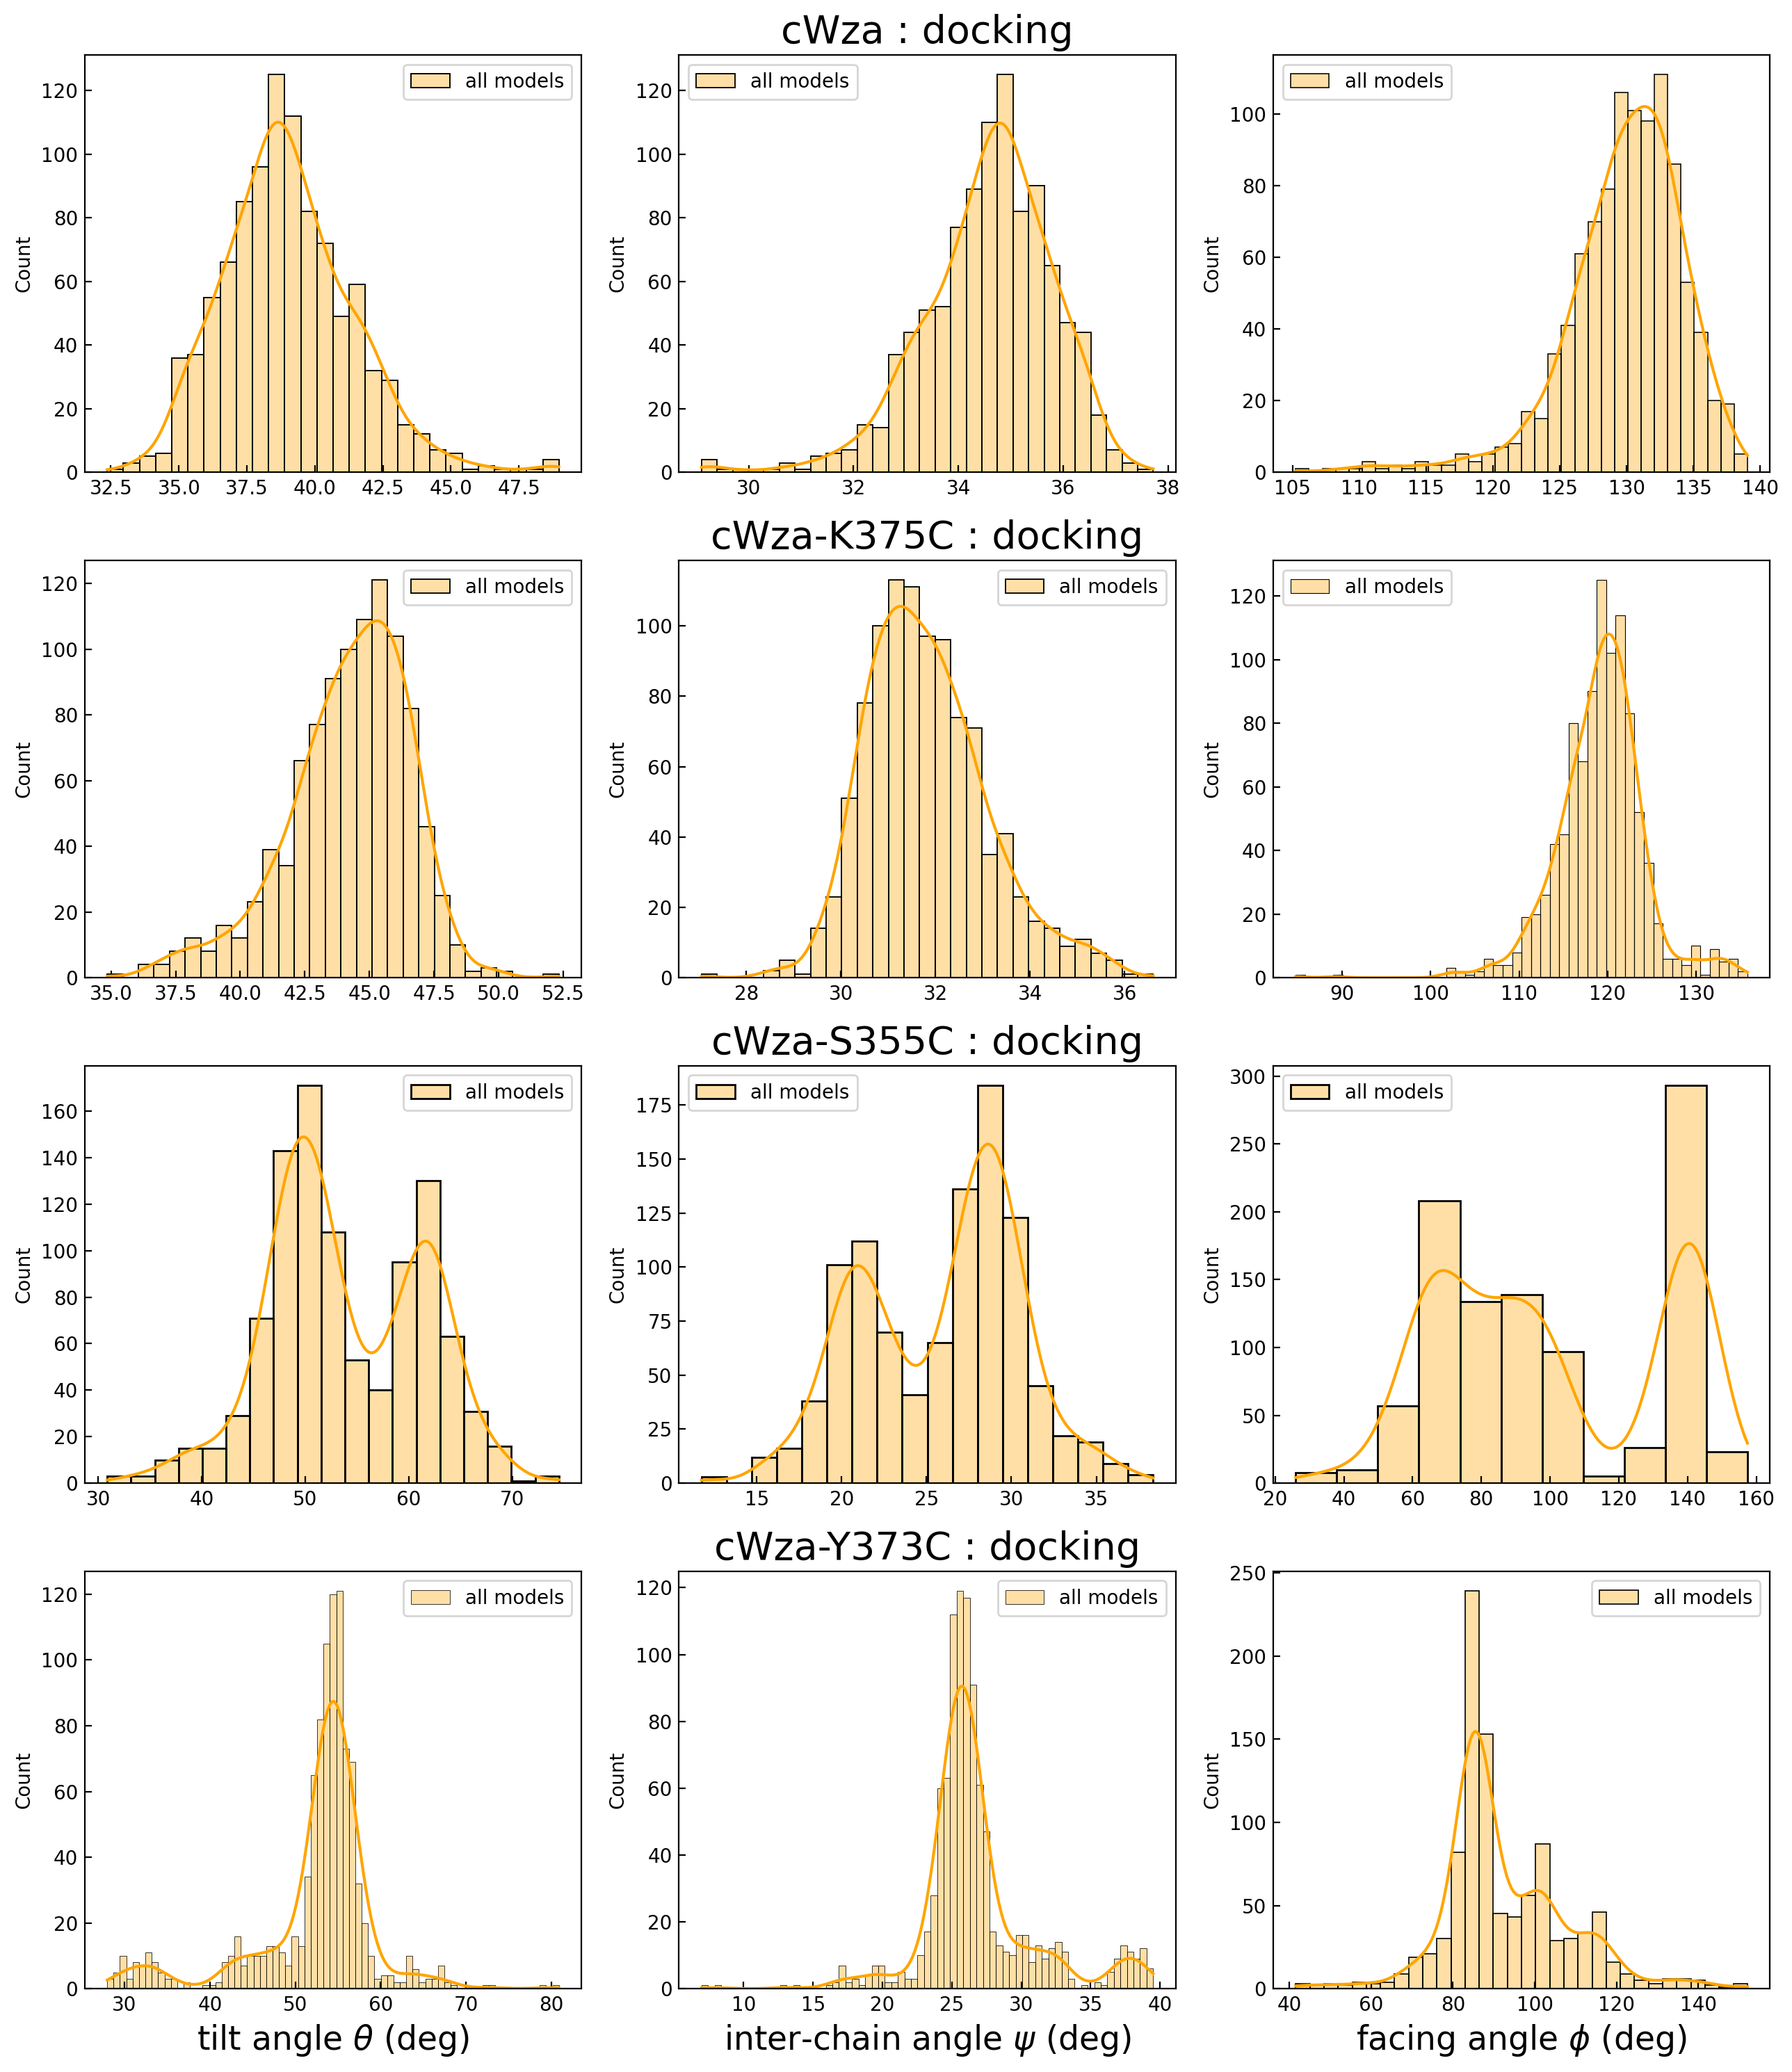

In [38]:
n_mutants = len(mutant_names)
f_hist, ax = plt.subplots(n_mutants,3,figsize=(13,15),dpi=200)

Colors = {
    'None':'orange'
}

xlabels = [
    "tilt angle $\\theta$ (deg)",
    "inter-chain angle $\\psi$ (deg)",
    "facing angle $\\phi$ (deg)"
]

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    group = 'None'
    
    # tilt, interchain, facing angle lists
    Theta = []; Psi = []; Phi = [] 
    
    model_ids = list(S_mutants[mutant].keys())
    for j in range(len(model_ids)):
        
        id = model_ids[j]
        euler_angles_mean = S_mutants[mutant][id]['euler angles']
        
        Theta.append( euler_angles_mean['tilt'] )
        Psi.append( euler_angles_mean['interchain'] )
        Phi.append( euler_angles_mean['facing'] )

    # plot histograms of mean angles
    color, label, alpha = (Colors[group], 'all models', 0.35)
    
    sns.histplot(Theta,color=color,label=label,kde=True,alpha=alpha,ax=ax[i,0])
    sns.histplot(Psi,color=color,label=label,kde=True,alpha=alpha,ax=ax[i,1])
    sns.histplot(Phi,color=color,label=label,kde=True,alpha=alpha,ax=ax[i,2])
    
    # customise title
    title = mutant+' : docking'
    ax[i,1].set_title(title,fontsize=20)
        
f_hist.subplots_adjust(hspace=0.3) # adjust space between subplots

# customise subplots
for i in range(3):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=17)
    for k in range(len(mutant_names)):
        ax[k,i].tick_params(axis='both',direction='in')
        ax[k,i].legend(loc='best')
    
f_hist.tight_layout()
plt.show()

# Distributions of mean peptide Euler angles (classified)

<span style="color:red"><b>TO-DO</b></span>

* Add plots of Euler angles classified by conformation group

In [ ]:
import seaborn as sns
sns.set_style('white')

n_mutants = len(mutant_names)
f_hist, ax = plt.subplots(n_mutants,3,figsize=(13,15),dpi=200)

xlabels = [
    "tilt angle $\\theta$ (deg)",
    "inter-chain angle $\\psi$ (deg)",
    "facing angle $\\phi$ (deg)"
]

Colors = {
    'cWza':{'Narrow':'blue', 'Wide':'green'},
    'cWza-K375C':{'Narrow':'green', 'Wide':'blue'},
    'cWza-S355C':{'Narrow':'blue', 'Wide':'green'},
    'cWza-Y373C':{'Single':'green'}
}

Conformations = {
    'cWza':['Narrow', 'Wide'],
    'cWza-K375C':['Narrow', 'Wide'],
    'cWza-S355C':['Narrow', 'Wide'],
    'cWza-Y373C':['Single']
}


for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    n_maxima = len(maxima_mutants[mutant])
    for n in range(n_maxima):
        conformation = Conformations[mutant][n]
        Theta = []; Psi = []; Phi = []
        # Create lists for radial metrics
        model_ids = Filtered_IDs[mutant]['conformation'+str(n)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            euler_angles = session.query(RigidBody.euler_angles).filter_by(id = id).all()[0][0]
            theta_per_chain, psi_per_chain_pair, phi_per_chain = euler_angles
            
            Theta.append( numpy.mean(theta_per_chain) )
            Psi.append( numpy.mean(psi_per_chain_pair) )
            Phi.append( numpy.mean(phi_per_chain) )
        
        if mutant == 'cWza-K375C' and n == 0:
            mylabel = 'Wide'
        elif mutant == 'cWza-K375C' and n == 1:
            mylabel = 'Narrow'
        else:
            mylabel = conformation
        sns.distplot(Theta,color=Colors[mutant][conformation],ax=ax[i,0],label = mylabel)
        sns.distplot(Psi,color=Colors[mutant][conformation],ax=ax[i,1],label = mylabel)
        sns.distplot(Phi,color=Colors[mutant][conformation],ax=ax[i,2],label = mylabel)
        #
        ax[i,0].tick_params(axis='both',direction='in')
        ax[i,1].tick_params(axis='both',direction='in')
        ax[i,2].tick_params(axis='both',direction='in')
    #
    ax[i,1].set_title(mutant+' : docked',fontsize=20)
    ax[i,0].set_ylabel('relative probability',fontsize=17)
    #
    ax[i,0].legend(loc='best',fontsize=13)
    ax[i,1].legend(loc='best',fontsize=13)
    ax[i,2].legend(loc='best',fontsize=13)

    
f_hist.subplots_adjust(hspace=0.3)
   
for i in range(3):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=17)
#     ax[0,i].legend(loc='best',fontsize=15)
    
#     ax[0,i].legend(loc='best')
plt.tight_layout()
plt.show()